# Clasification

# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

> ## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
bankloan = pd.read_csv('../data/bankloan.csv')
bankloan

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0     41   3      17       12     176      9.3  11.359392  5.008608        1
1     27   1      10        6      31     17.3   1.362202  4.000798        0
2     40   1      15       14      55      5.5   0.856075  2.168925        0
3     41   1      15       14     120      2.9   2.658720  0.821280        0
4     24   2       2        0      28     17.3   1.787436  3.056564        1
..   ...  ..     ...      ...     ...      ...        ...       ...      ...
695   36   2       6       15      27      4.6   0.262062  0.979938        1
696   29   2       6        4      21     11.5   0.369495  2.045505        0
697   33   1      15        3      32      7.6   0.491264  1.940736        0
698   45   1      19       22      77      8.4   2.302608  4.165392        0
699   37   1      12       14      44     14.7   2.994684  3.473316        0

[700 rows x 9 columns]

> ## Data Splitting

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [4]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [5]:
X = bankloan[fitur]
y = bankloan[target]

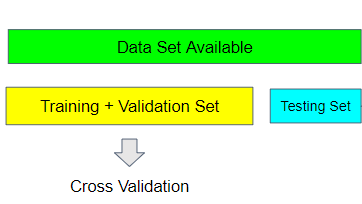

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

> ## Model Evaluation : Benchmark

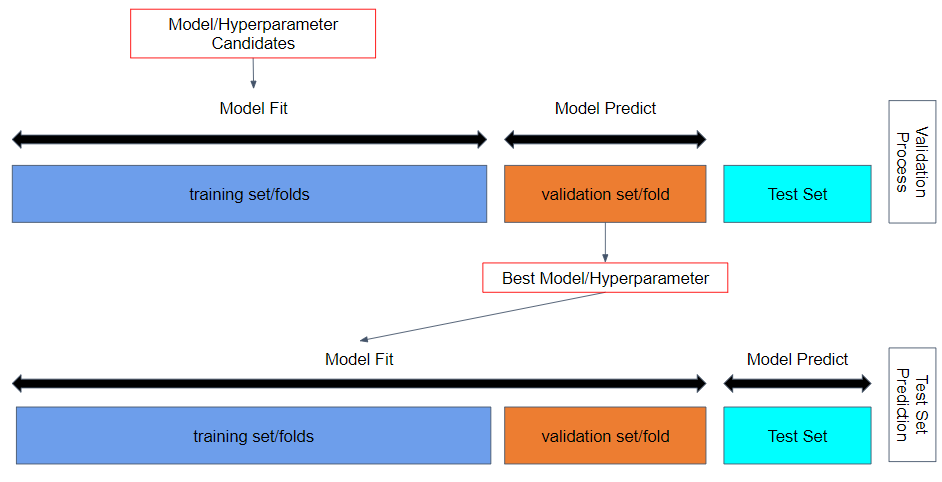

In [7]:
# model benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Accuracy

In [9]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [10]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)
print('CV DTC:', tree_cv)

CV Logreg: [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV KNN: [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV DTC: [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


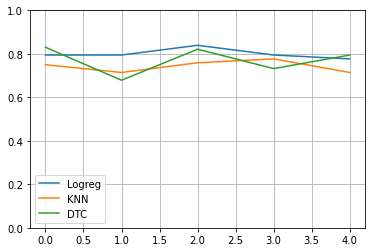

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.plot(range(len(tree_cv)), tree_cv, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [12]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())
print('CV DTC:', tree_cv.mean())

CV Logreg: 0.8
CV KNN: 0.7428571428571429
CV DTC: 0.7714285714285716


In [13]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())
print('CV DTC:', tree_cv.std())

CV Logreg: 0.020824828195876083
CV KNN: 0.024872121923543065
CV DTC: 0.057753434388557956


### Recall

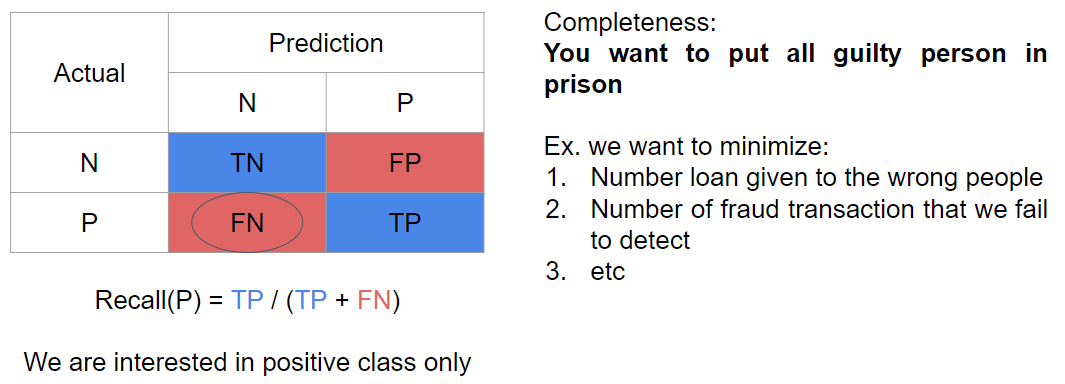

In [14]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='recall')
knn_cv_rc = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
tree_cv_rc = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [15]:
print('CV Logreg:', logreg_cv_rc)
print('CV KNN:', knn_cv_rc)
print('CV DTC:', tree_cv_rc)

CV Logreg: [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV KNN: [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV DTC: [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


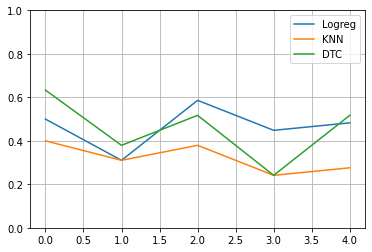

In [16]:
plt.plot(range(len(logreg_cv_rc)), logreg_cv_rc, label='Logreg')
plt.plot(range(len(knn_cv_rc)), knn_cv_rc, label='KNN')
plt.plot(range(len(tree_cv_rc)), tree_cv_rc, label='DTC')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

In [17]:
print('CV Logreg:', logreg_cv_rc.mean())
print('CV KNN:', knn_cv_rc.mean())
print('CV DTC:', tree_cv_rc.mean())

CV Logreg: 0.46551724137931033
CV KNN: 0.3213793103448276
CV DTC: 0.4577011494252874


In [18]:
print('CV Logreg:', logreg_cv_rc.std())
print('CV KNN:', knn_cv_rc.std())
print('CV DTC:', tree_cv_rc.std())

CV Logreg: 0.08992003317520893
CV KNN: 0.06021759987018779
CV DTC: 0.13481616986286768


### Flexible Metrics

In [19]:
skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'

def model_evaluation_cv(model, metric, fold):
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = fold, scoring = metric)
    return model_cv

In [20]:
def print_result(model_cv):
    print('CV Score:', model_cv)
    print('CV Score mean:', model_cv.mean())
    print('CV Score std:', model_cv.std())

In [21]:
model_cv = model_evaluation_cv(model, metric, skfold)
model_cv

array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])

In [22]:
print_result(model_cv)

CV Score: [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV Score mean: 0.543564482325905
CV Score std: 0.06927688261828344


### Cross Validate

In [23]:
from sklearn.model_selection import cross_validate
model_cv = cross_validate(model, X_train_val, y_train_val, cv = skfold, scoring = ['precision', 'recall', 'accuracy', 'f1'])
model_cv

{'fit_time': array([0.00698042, 0.00836873, 0.00961447, 0.00686955, 0.01899767]),
 'score_time': array([0.01512885, 0.022609  , 0.01402259, 0.00698328, 0.01244688]),
 'test_precision': array([0.65217391, 0.75      , 0.73913043, 0.65      , 0.58333333]),
 'test_recall': array([0.5       , 0.31034483, 0.5862069 , 0.44827586, 0.48275862]),
 'test_accuracy': array([0.79464286, 0.79464286, 0.83928571, 0.79464286, 0.77678571]),
 'test_f1': array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])}

In [24]:
cv_df = pd.DataFrame(model_cv, index=[f'fold_{x}' for x in range(1,6)])
cv_df

fit_time  score_time  test_precision  test_recall  test_accuracy  \
fold_1  0.006980    0.015129        0.652174     0.500000       0.794643   
fold_2  0.008369    0.022609        0.750000     0.310345       0.794643   
fold_3  0.009614    0.014023        0.739130     0.586207       0.839286   
fold_4  0.006870    0.006983        0.650000     0.448276       0.794643   
fold_5  0.018998    0.012447        0.583333     0.482759       0.776786   

         test_f1  
fold_1  0.566038  
fold_2  0.439024  
fold_3  0.653846  
fold_4  0.530612  
fold_5  0.528302

In [25]:
cv_df['test_precision'].std()

0.06943791189606445

### Model Performance in Test Set

In [26]:
model

LogisticRegression(random_state=2020, solver='liblinear')

In [27]:
model.fit(X_train_val, y_train_val)

LogisticRegression(random_state=2020, solver='liblinear')

In [28]:
y_pred = model.predict(X_test)

In [29]:
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

recall: 0.4864864864864865
precision: 0.782608695652174
f1: 0.6000000000000001


In [30]:
cv_df.describe()

fit_time  score_time  test_precision  test_recall  test_accuracy  \
count  5.000000    5.000000        5.000000     5.000000       5.000000   
mean   0.010166    0.014238        0.674928     0.465517       0.800000   
std    0.005063    0.005629        0.069438     0.100534       0.023283   
min    0.006870    0.006983        0.583333     0.310345       0.776786   
25%    0.006980    0.012447        0.650000     0.448276       0.794643   
50%    0.008369    0.014023        0.652174     0.482759       0.794643   
75%    0.009614    0.015129        0.739130     0.500000       0.794643   
max    0.018998    0.022609        0.750000     0.586207       0.839286   

        test_f1  
count  5.000000  
mean   0.543564  
std    0.077454  
min    0.439024  
25%    0.528302  
50%    0.530612  
75%    0.566038  
max    0.653846

In [31]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.84      0.95      0.89       103
    Positive       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [32]:
# precision(+)
precision_score(y_test, y_pred, pos_label=1)

0.782608695652174

In [33]:
# precision(-)
precision_score(y_test, y_pred, pos_label=0)

0.8376068376068376

In [34]:
f1_score(y_test, y_pred, pos_label=0)

0.8909090909090909

In [35]:
# macro
(0.84+0.78)/2

0.81

In [36]:
# weighted
(((103/140)*0.84)+((37/140)*0.78))

0.8241428571428572

In [37]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

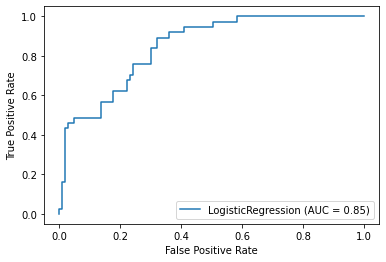

In [38]:
plot_roc_curve(model, X_test, y_test)
plt.show()

In [39]:
y_prob1 = model.predict_proba(X_test)[:,1]
y_prob1
roc_auc_score(y_test, y_prob1)

0.8475465757019154

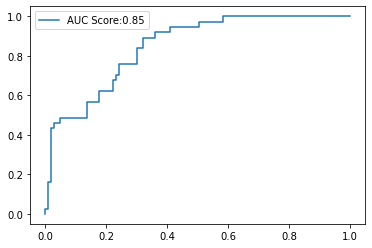

In [40]:
fpr, tpr, thr = roc_curve(y_test, y_prob1)
plt.plot(fpr, tpr)
plt.legend([f'AUC Score:{round(roc_auc_score(y_test, y_prob1),2)}'])

In [41]:
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thr': thr})
roc_df[roc_df['tpr']>0.8].sort_values('fpr')

fpr       tpr       thr
21  0.300971  0.837838  0.269020
22  0.320388  0.837838  0.260175
23  0.320388  0.891892  0.254902
24  0.359223  0.891892  0.226951
25  0.359223  0.918919  0.219228
26  0.407767  0.918919  0.188749
27  0.407767  0.945946  0.181573
28  0.504854  0.945946  0.143030
29  0.504854  0.972973  0.135471
30  0.582524  0.972973  0.105802
31  0.582524  1.000000  0.100907
32  1.000000  1.000000  0.003392

In [42]:
len(y_prob1)
y_test
# len(y_pred)

default
118        1
309        0
339        1
686        0
639        0
..       ...
597        1
58         0
467        0
148        0
681        1

[140 rows x 1 columns]

In [43]:
new_thr = 0.254902
y_pred = model.predict(X_test) # threshold 0.5
y_pred025 = [1 if i > new_thr else 0 for i in model.predict_proba(X_test)[:,1]] # threshold 0.254902
prob_df = pd.DataFrame({'prob_1': y_prob1, 'y_pred_nt': y_pred025, 'y_pred': y_pred})
prob_df.head()

prob_1  y_pred_nt  y_pred
0  0.591712          1       1
1  0.314290          1       0
2  0.310958          1       0
3  0.409367          1       0
4  0.240005          0       0

In [44]:
np.where(model.predict_proba(X_test)[:,1]>new_thr,1,0)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0])

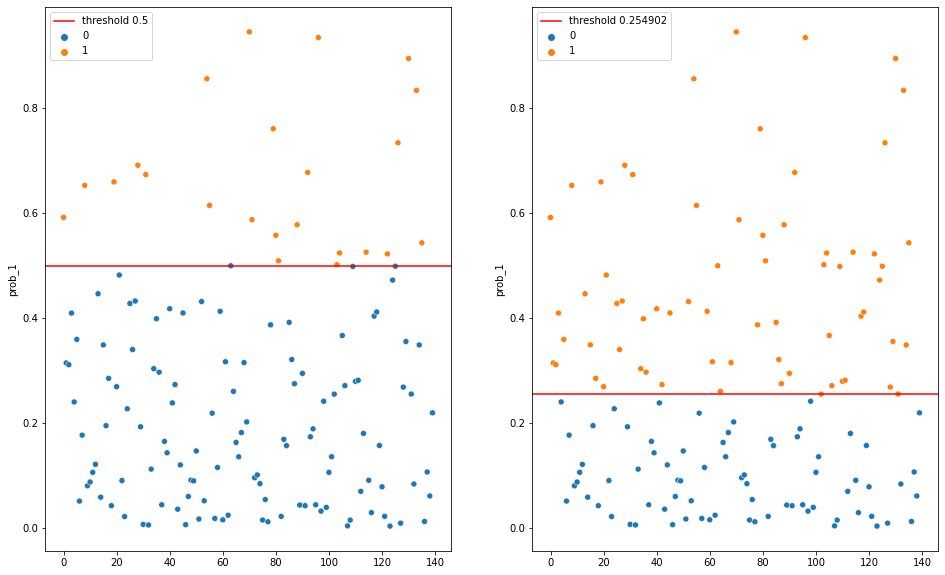

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       103
           1       0.50      0.89      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.79      0.72       140
weighted avg       0.83      0.74      0.75       140



In [45]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.subplot(121)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred'])
plt.axhline(0.5, color='red', label='threshold 0.5')
plt.legend()

plt.subplot(122)
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred_nt'])
plt.axhline(new_thr, color='red', label=f'threshold {new_thr}')
plt.legend()

plt.show()

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred025))

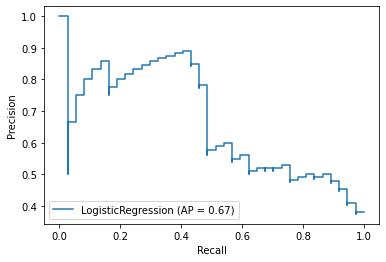

In [46]:
plot_precision_recall_curve(model, X_test, y_test)
plt.show()

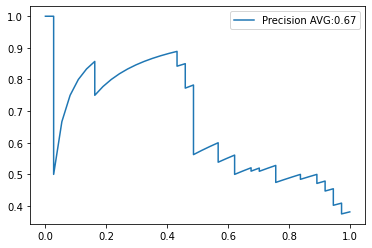

In [47]:
pr, rc, thr = precision_recall_curve(y_test, y_prob1)
plt.plot(rc, pr)
plt.legend([f'Precision AVG:{round(average_precision_score(y_test, y_prob1),2)}'])

In [48]:
pr_df = pd.DataFrame({'precision': pr[:-1], 'recall': rc[:-1], 'thresholds': thr})
pr_df[pr_df['recall']>0.8].sort_values('precision', ascending=False)

precision    recall  thresholds
35   0.500000  0.837838    0.269020
31   0.500000  0.891892    0.254902
30   0.492537  0.891892    0.241334
32   0.492308  0.864865    0.255088
34   0.492063  0.837838    0.268279
36   0.491803  0.810811    0.271023
29   0.485294  0.891892    0.240005
33   0.484375  0.837838    0.260175
26   0.478873  0.918919    0.219228
28   0.478261  0.891892    0.238153
25   0.472222  0.918919    0.218631
27   0.471429  0.891892    0.226951
24   0.465753  0.918919    0.201910
23   0.459459  0.918919    0.194794
20   0.454545  0.945946    0.181573
22   0.453333  0.918919    0.192620
19   0.448718  0.945946    0.179955
21   0.447368  0.918919    0.188749
18   0.443038  0.945946    0.176737
17   0.437500  0.945946    0.173559
16   0.432099  0.945946    0.168732
15   0.426829  0.945946    0.164805
14   0.421687  0.945946    0.162731
13   0.416667  0.945946    0.156934
12   0.411765  0.945946    0.156638
9    0.409091  0.972973    0.135471
11   0.406977  0.945946    0.146576
8    0.404494  0.972973    0.135460
10   0.402299  0.945946    0.143030
7    0.400000  0.972973    0.121079
6    0.395604  0.972973    0.119980
5    0.391304  0.972973    0.115053
4    0.387097  0.972973    0.111974
3    0.382979  0.972973    0.106504
0    0.381443  1.000000    0.100907
2    0.378947  0.972973    0.105869
1    0.375000  0.972973    0.105802

## Hyperparameter Tuning Grid Search

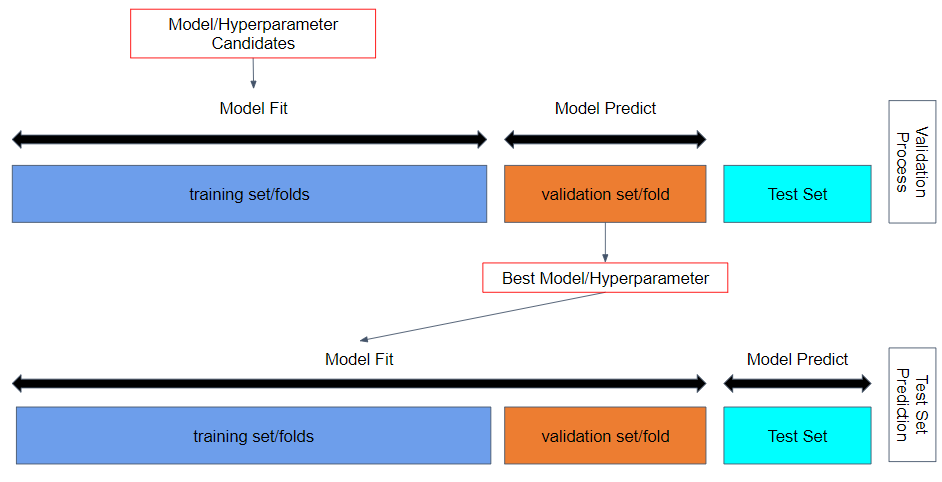

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [50]:
logreg_bench = LogisticRegression()

hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6 15 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [51]:
skfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    logreg_bench,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [52]:
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   16.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='recall', verbose=1)

In [53]:
print('best recall score:', grid_search.best_score_)
print('best param:', grid_search.best_params_)

best recall score: 0.4724137931034482
best param: {'C': 1000, 'max_iter': 100}


In [54]:
pd.DataFrame(grid_search.cv_results_).sort_values('std_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
89       0.030149      0.004532         0.008063        0.002371  0.0001   
84       0.058104      0.010594         0.010137        0.001277  0.0001   
85       0.049802      0.005240         0.008973        0.001906  0.0001   
88       0.047202      0.008936         0.007411        0.000299  0.0001   
87       0.043903      0.010736         0.012947        0.003517  0.0001   
..            ...           ...              ...             ...     ...   
76       0.046875      0.007664         0.015058        0.004312   0.001   
74       0.045492      0.009794         0.012340        0.003989   0.001   
73       0.035981      0.007672         0.009901        0.002427   0.001   
72       0.074773      0.022261         0.010498        0.004211   0.001   
75       0.038032      0.006219         0.010875        0.004281   0.001   

   param_max_iter                           params  split0_test_score  \
89           1000  {'C': 0.0001, 'max_iter': 1000}           0.000000   
84            100   {'C': 0.0001, 'max_iter': 100}           0.000000   
85            200   {'C': 0.0001, 'max_iter': 200}           0.000000   
88            500   {'C': 0.0001, 'max_iter': 500}           0.000000   
87            400   {'C': 0.0001, 'max_iter': 400}           0.000000   
..            ...                              ...                ...   
76            500    {'C': 0.001, 'max_iter': 500}           0.333333   
74            300    {'C': 0.001, 'max_iter': 300}           0.333333   
73            200    {'C': 0.001, 'max_iter': 200}           0.333333   
72            100    {'C': 0.001, 'max_iter': 100}           0.333333   
75            400    {'C': 0.001, 'max_iter': 400}           0.333333   

    split1_test_score  split2_test_score  split3_test_score  \
89           0.068966           0.034483           0.000000   
84           0.068966           0.034483           0.000000   
85           0.068966           0.034483           0.000000   
88           0.068966           0.034483           0.000000   
87           0.068966           0.034483           0.000000   
..                ...                ...                ...   
76           0.275862           0.241379           0.103448   
74           0.275862           0.241379           0.103448   
73           0.275862           0.241379           0.103448   
72           0.275862           0.241379           0.103448   
75           0.275862           0.241379           0.103448   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
89           0.000000         0.020690        0.027586               85  
84           0.000000         0.020690        0.027586               85  
85           0.000000         0.020690        0.027586               85  
88           0.000000         0.020690        0.027586               85  
87           0.000000         0.020690        0.027586               85  
..                ...              ...             ...              ...  
76           0.413793         0.273563        0.103167               73  
74           0.413793         0.273563        0.103167               73  
73           0.413793         0.273563        0.103167               73  
72           0.413793         0.273563        0.103167               73  
75           0.413793         0.273563        0.103167               73  

[90 rows x 15 columns]

In [55]:
logreg_bench.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
print('best estimator:', grid_search.best_estimator_)

best estimator: LogisticRegression(C=1000)


> ## Final Result Comparison : Hyperparameter Tuning Grid Search

In [57]:
# model benchmark
logreg_bench.fit(X_train_val, y_train_val)
y_pred_bench = logreg_bench.predict(X_test)
print(classification_report(y_test, y_pred_bench))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



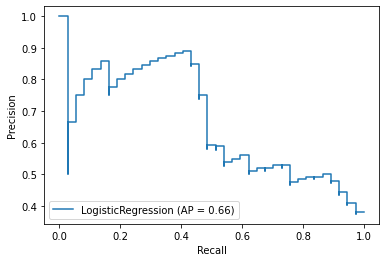

In [58]:
plot_precision_recall_curve(logreg_bench, X_test, y_test)

In [59]:
type(logreg_bench)

sklearn.linear_model._logistic.LogisticRegression

In [60]:
# model tuned
logreg_tuned = grid_search.best_estimator_
logreg_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = logreg_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



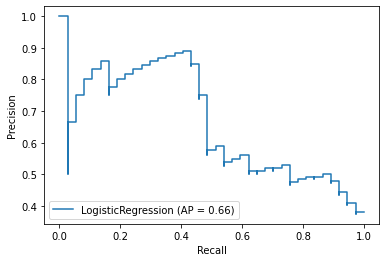

In [61]:
plot_precision_recall_curve(logreg_tuned, X_test, y_test)

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)

In [62]:
random_search = RandomizedSearchCV(
    logreg_bench,
    param_distributions = hyperparam_space,
    n_iter=180,
    cv = StratifiedKFold(n_splits=5),
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [63]:
random_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    8.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=180, n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                              0.0005, 0.0001],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     1000]},
                   scoring='recall', verbose=1)

In [64]:
i = 2
display(pd.DataFrame(random_search.cv_results_).head(i))
display(pd.DataFrame(grid_search.cv_results_).head(i))

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.067544      0.007237         0.025826        0.015857   
1       0.080178      0.035542         0.011613        0.006726   

  param_max_iter param_C                        params  split0_test_score  \
0            100    1000  {'max_iter': 100, 'C': 1000}                0.5   
1            200    1000  {'max_iter': 200, 'C': 1000}                0.5   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.344828           0.586207           0.448276           0.482759   
1           0.344828           0.586207           0.448276           0.482759   

   mean_test_score  std_test_score  rank_test_score  
0         0.472414         0.07833                1  
1         0.472414         0.07833                1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.071751      0.016462         0.010119        0.002257    1000   
1       0.075494      0.026638         0.016545        0.002416    1000   

  param_max_iter                        params  split0_test_score  \
0            100  {'C': 1000, 'max_iter': 100}                0.5   
1            200  {'C': 1000, 'max_iter': 200}                0.5   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.344828           0.586207           0.448276           0.482759   
1           0.344828           0.586207           0.448276           0.482759   

   mean_test_score  std_test_score  rank_test_score  
0         0.472414         0.07833                1  
1         0.472414         0.07833                1

## Algorithm Chains: Adult Dataset

> ## Data

In [65]:
!pip install category_encoders

In [66]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [67]:
adult = pd.read_csv('../data/adult.csv')
adult

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [68]:
adult.replace('?', np.nan, inplace=True)

In [69]:
adult.isnull().sum()/len(adult)*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [70]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [71]:
adult[['workclass', 'occupation', 'native.country', 'marital.status']].describe()

workclass      occupation native.country      marital.status
count      30725           30718          31978               32561
unique         8              14             41                   7
top      Private  Prof-specialty  United-States  Married-civ-spouse
freq       22696            4140          29170               14976

> ## Preprocessing

- Workclass:
    - Imputation: most-frequent / Private
    - Binary Encoding
- Occupation:
    - Imputation: most-frequent / Prof-specialty
    - Binary Encoding
- Native Country:
    - Imputation: most-frequent / United-States
    - Binary Encoding
- Marital, Relationship, Race, Sex:
    - One Hot Encoding

In [72]:
workclass_pipeline = Pipeline([
    ('imputer_wc', SimpleImputer(strategy='most_frequent')),
    ('binary_wc', ce.BinaryEncoder())
])

occupation_pipeline = Pipeline([
    ('imputer_oc', SimpleImputer(strategy='most_frequent')),
    ('binary_oc', ce.BinaryEncoder())
])

native_pipeline = Pipeline([
    ('imputer_nc', SimpleImputer(strategy='constant', fill_value='United-States')),
    ('binary_nc', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('workclass_transform', workclass_pipeline, ['workclass']),
    ('occupation_transform', occupation_pipeline, ['occupation']),
    ('native_transform', native_pipeline, ['native.country']),
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['marital.status', 'relationship', 'race', 'sex'])
], remainder = 'passthrough')

> ## Data Splitting

In [73]:
X = adult.drop(columns=['fnlwgt', 'income', 'education'])
y = np.where(adult['income']=='>50K',1,0)

In [74]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    random_state = 2020
)

In [75]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', tree)
])

In [76]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring='f1')

In [77]:
print('CV Score:', model_cv)
print('CV Score Mean:', model_cv.mean())
print('CV Score Std:', model_cv.std())

CV Score: [0.58780992 0.63417085 0.60612351 0.64115308 0.62022704]
CV Score Mean: 0.6178968798729898
CV Score Std: 0.019261154653167665


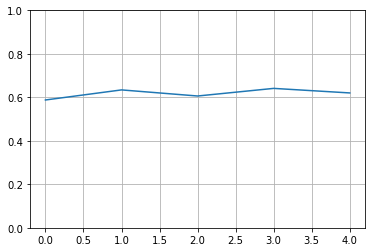

In [78]:
plt.plot(range(len(model_cv)), model_cv)
plt.grid()
plt.ylim(0,1)
plt.show()

In [79]:
logreg = LogisticRegression(random_state=2020)

logreg_pipeline = Pipeline([
    ('preprocess', transformer),
    ('clf', logreg)
])

logreg_cv = cross_val_score(logreg_pipeline, X_train_val, y_train_val, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished


In [80]:
print('CV Score:', logreg_cv)
print('CV Score Mean:', logreg_cv.mean())
print('CV Score Std:', logreg_cv.std())

CV Score: [0.56315527 0.59215686 0.60575968 0.61708253 0.61635833]
CV Score Mean: 0.5989025341754429
CV Score Std: 0.02002802379400768


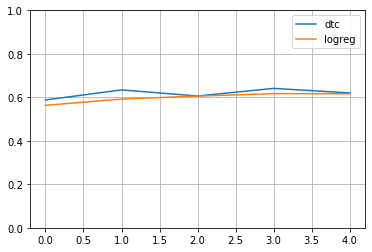

In [81]:
plt.plot(range(len(model_cv)), model_cv, label='dtc')
plt.plot(range(len(logreg_cv)), logreg_cv, label='logreg')
plt.grid()
plt.legend()
plt.ylim(0,1)
plt.show()

## Hyperparameter Tuning

In [82]:
type(estimator)

sklearn.pipeline.Pipeline

In [83]:
# estimator (DTC)
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('workclass_transform',
                                    Pipeline(steps=[('imputer_wc',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('binary_wc',
                                                     BinaryEncoder())]),
                                    ['workclass']),
                                   ('occupation_transform',
                                    Pipeline(steps=[('imputer_oc',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('binary_oc',
                                                     BinaryEncoder())]),
                                    ['occupation']),
                                   ('native_transform',
                             

In [84]:
hyperparam_space = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5,10,15,20],
    'clf__min_samples_split': [5,6,7,8]
}

grid_search_dtc = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

In [85]:
grid_search_dtc.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('workclass_transform',
                                                                         Pipeline(steps=[('imputer_wc',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('binary_wc',
                                                                                          BinaryEncoder())]),
                                                                         ['workclass']),
                                                                        ('occupation_transform',
                                                     

In [86]:
print('estimator dtc tuned score:', grid_search_dtc.best_score_)
print('estimator dtc best params:', grid_search_dtc.best_params_)

estimator dtc tuned score: 0.6755073403632493
estimator dtc best params: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_split': 5}


In [87]:
pd.DataFrame(grid_search_dtc.cv_results_).sort_values('rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20       1.667902      0.087796         0.173468        0.013837   
22       1.330056      0.062729         0.113667        0.007301   
21       1.514819      0.133853         0.112528        0.011479   
23       1.343108      0.118047         0.152127        0.018846   
4        1.197192      0.022976         0.113386        0.006445   
6        1.434532      0.104194         0.143390        0.025593   
5        1.272166      0.070457         0.130221        0.022908   
7        1.459756      0.089668         0.123307        0.016572   
9        1.274470      0.024283         0.156669        0.017064   
11       1.570104      0.084995         0.108427        0.017803   
10       1.528064      0.090172         0.145427        0.029099   
8        1.296634      0.049901         0.106558        0.007737   
26       1.329269      0.061356         0.131710        0.026200   
25       1.684558      0.105131         0.147255        0.034635   
24       1.659651      0.076643         0.164731        0.048472   
27       1.388181      0.063176         0.121812        0.006551   
28       1.587345      0.068738         0.143485        0.028680   
31       1.526593      0.135169         0.153547        0.024455   
29       1.439725      0.127116         0.101005        0.007495   
30       1.498522      0.073560         0.111974        0.019174   
12       1.322228      0.050615         0.112453        0.010857   
14       1.656632      0.186277         0.147816        0.038021   
15       1.900061      0.135518         0.148679        0.038931   
13       1.296977      0.042066         0.140115        0.034895   
3        1.240509      0.079441         0.122075        0.034730   
2        1.502191      0.097242         0.158589        0.021759   
1        1.211011      0.141660         0.136626        0.028061   
0        1.129534      0.066358         0.110880        0.029432   
18       1.124331      0.061144         0.111319        0.010248   
17       1.327457      0.118559         0.126691        0.035994   
16       1.526447      0.062521         0.154547        0.023938   
19       1.229102      0.083385         0.117267        0.012991   

   param_clf__criterion param_clf__max_depth param_clf__min_samples_split  \
20              entropy                   10                            5   
22              entropy                   10                            7   
21              entropy                   10                            6   
23              entropy                   10                            8   
4                  gini                   10                            5   
6                  gini                   10                            7   
5                  gini                   10                            6   
7                  gini                   10                            8   
9                  gini                   15                            6   
11                 gini                   15                            8   
10                 gini                   15                            7   
8                  gini                   15                            5   
26              entropy                   15                            7   
25              entropy                   15                            6   
24              entropy                   15                            5   
27              entropy                   15                            8   
28              entropy                   20                            5   
31              entropy                   20                            8   
29              entropy                   20                            6   
30              entropy                   20                            7   
12                 gini                   20                            5   
14                 gini                   20                     

## Result Comparison

In [88]:
estimator.fit(X_train_val, y_train_val)
y_pred_bench = estimator.predict(X_test)

print(classification_report(y_test, y_pred_bench))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6181
           1       0.79      0.51      0.62      1960

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [89]:
estimator_tuned = grid_search_dtc.best_estimator_
estimator_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6181
           1       0.71      0.66      0.69      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.85      0.85      8141



In [90]:
precision, recall, thr = precision_recall_curve(y_test, estimator_tuned.predict_proba(X_test)[:,1])
pr_df = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thr': thr})
pr_df

precision    recall       thr
0    0.240757  1.000000  0.000000
1    0.317822  0.982653  0.003497
2    0.333160  0.981633  0.004219
3    0.337430  0.980612  0.004630
4    0.341268  0.980102  0.007143
..        ...       ...       ...
79   0.922591  0.297959  0.800000
80   0.926868  0.297449  0.846154
81   0.939024  0.275000  0.888889
82   0.946996  0.273469  0.906977
83   0.946043  0.268367  1.000000

[84 rows x 3 columns]

In [91]:
pr_df[pr_df['precision']<=0.8].sort_values('recall', ascending=True).head(20)

precision    recall       thr
69   0.784661  0.542857  0.571918
68   0.780772  0.546939  0.571429
67   0.778825  0.547959  0.562500
66   0.778339  0.550000  0.560000
65   0.776420  0.551020  0.538462
64   0.776824  0.554082  0.535714
63   0.714128  0.660204  0.517992
62   0.713268  0.663776  0.500000
61   0.710005  0.677041  0.472441
60   0.709246  0.677041  0.444444
59   0.708422  0.678061  0.411765
58   0.704017  0.679592  0.400000
57   0.698953  0.681122  0.397059
56   0.687247  0.692857  0.370000
55   0.613286  0.791327  0.364454
54   0.603723  0.810714  0.363112
53   0.588893  0.833163  0.345324
52   0.585027  0.837245  0.342105
50   0.583452  0.838265  0.300000
51   0.584074  0.838265  0.333333

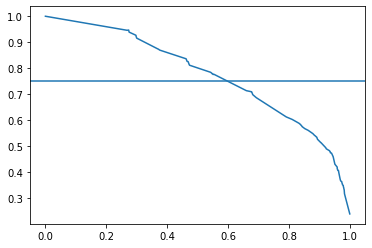

In [92]:
plt.plot(recall, precision)
plt.axhline(0.75)

In [93]:
new_thr = 0.411765
y_pred041 = np.where(estimator_tuned.predict_proba(X_test)[:,1]> new_thr,1,0)

In [94]:
print(classification_report(y_test, y_pred041))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6181
           1       0.71      0.68      0.69      1960

    accuracy                           0.86      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.86      0.85      8141



In [95]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6181
           1       0.71      0.66      0.69      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.85      0.85      8141



# Regression

In [96]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [97]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

> ## Data Splitting

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [99]:
X = pd.get_dummies(tips.drop('tip', axis=1))
y = tips['tip']

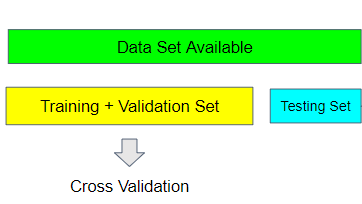

In [102]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=2020)

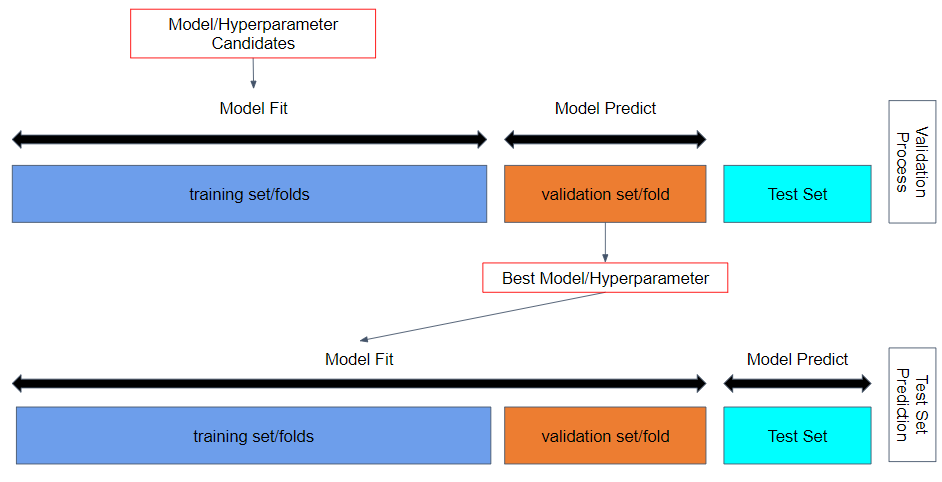

In [103]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
linreg = LinearRegression()

In [104]:
from sklearn.metrics import SCORERS

In [105]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [106]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

<AxesSubplot:ylabel='Frequency'>

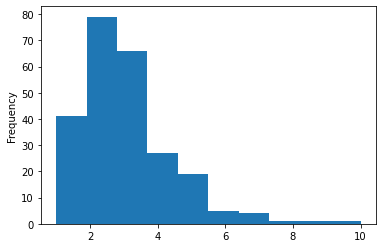

In [108]:
y.plot(kind='hist')

In [109]:
tree_cv = cross_val_score(tree, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [110]:
print('CV Score:', tree_cv)
print('CV Score mean:', tree_cv.mean())
print('CV Score std:', tree_cv.std())

# konteks regresi dan scoring menggunakan error base
# untuk score.mean() semakin mendekati 0, semakin baik
# untuk score.std() semakin kecil, semakin baik

# konteks regresi dan scoring menggunakan R2
# untuk score.mean() semakin mendekati 1, semakin baik
# untuk score.std() semakin kecil, semakin baik

# konteks classification, scoring range 0-1
# untuk score.mean() semakin mendekati 1, semakin baik
# untuk score.std() semakin kecil, semakin baik

CV Score: [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV Score mean: -1.2432694552627068
CV Score std: 0.28004351146399903


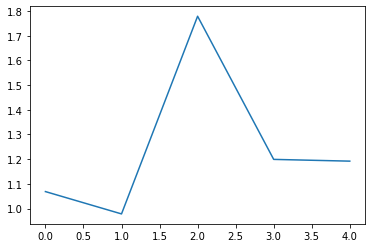

In [113]:
plt.plot(range(len(tree_cv)), np.abs(tree_cv))
plt.show()

In [114]:
lr_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [115]:
print('CV Score:', lr_cv)
print('CV Score mean:', lr_cv.mean())
print('CV Score std:', lr_cv.std())

CV Score: [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV Score mean: -1.1320214803006685
CV Score std: 0.33933163195266225


## MODEL PERFORMANCE (TREE)

In [117]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)

DecisionTreeRegressor(max_depth=5)

In [118]:
y_pred = tree.predict(X_test)

In [119]:
print(mean_squared_error(y_test, y_pred))

1.5169685323655517


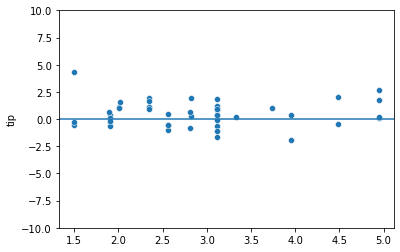

In [120]:
residuals = y_test - y_pred

sns.scatterplot(y_pred, residuals)
plt.axhline(0)
plt.ylim(-10,10)
plt.show()

> ## Hyperparameter Tuning (tree)

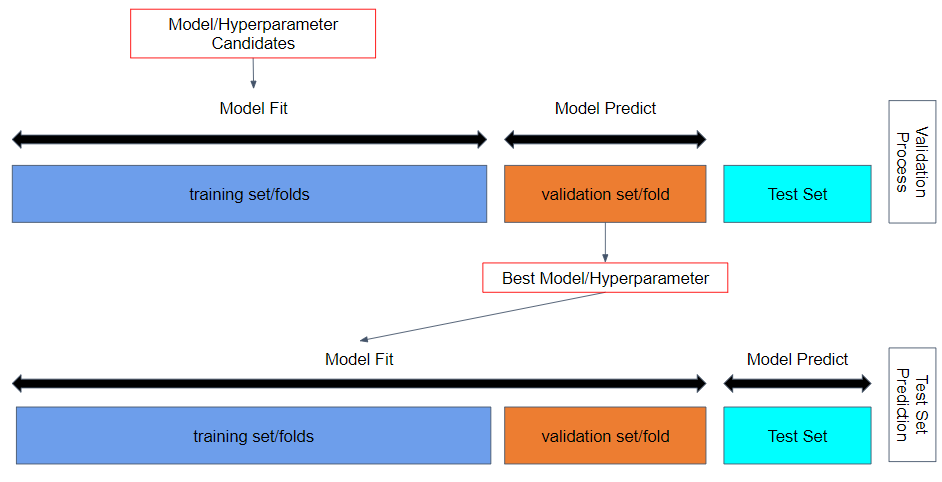

In [122]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [123]:
hyperparam_space = {
    'min_samples_leaf': [1,5,10,15,20,50],
    'max_depth': [2,3,4,5,6,7],
    'criterion': ['mae', 'mse']
}

1. min_samples_leaf  6 hyperparameters
1. max_depht 5 hyperparameters
1. criterion 2 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 6*5*2*5 = 300 times 

In [125]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)

randomized_search = RandomizedSearchCV(
    tree,
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1,
    verbose=1
)

In [126]:
randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.5s finished


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mae', 'mse'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error',
                   verbose=1)

In [127]:
print('best score:', randomized_search.best_score_)
print('best params:', randomized_search.best_params_)

best score: -0.925876794871795
best params: {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mae'}


In [130]:
pd.DataFrame(randomized_search.cv_results_).sort_values(['rank_test_score', 'std_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.022571      0.006509         0.007013        0.001900   
0        0.016020      0.006223         0.005474        0.000624   
9        0.018378      0.009873         0.009536        0.006956   
8        0.022124      0.016716         0.015109        0.013658   
17       0.028628      0.011694         0.012929        0.007378   
7        0.026721      0.014054         0.014002        0.012709   
3        0.021533      0.005932         0.008760        0.001316   
2        0.015831      0.002587         0.006755        0.001528   
1        0.031621      0.010176         0.016222        0.010340   
12       0.015947      0.004073         0.012867        0.007769   
11       0.012300      0.002180         0.006207        0.001823   
16       0.015302      0.002217         0.007992        0.002845   
13       0.010395      0.003684         0.005927        0.002060   
14       0.028651      0.019820         0.007604        0.002954   
10       0.022670      0.022891         0.015708        0.012761   
4        0.022678      0.008652         0.021933        0.017936   
18       0.008418      0.002206         0.004925        0.002229   
19       0.014358      0.003558         0.017299        0.014222   
5        0.021496      0.011836         0.009335        0.005246   
15       0.018877      0.008280         0.007197        0.004039   

   param_min_samples_leaf param_max_depth param_criterion  \
6                       1               4             mae   
0                       1               2             mse   
9                       1               2             mae   
8                      20               4             mse   
17                     10               4             mae   
7                       5               3             mae   
3                      20               2             mse   
2                       5               4             mae   
1                       5               7             mae   
12                     20               7             mae   
11                     15               7             mae   
16                     15               6             mae   
13                     10               3             mse   
14                     50               5             mse   
10                     15               3             mse   
4                       5               2             mse   
18                     15               5             mse   
19                     15               2             mse   
5                      50               7             mae   
15                     50               4             mae   

                                               params  split0_test_score  \
6   {'min_samples_leaf': 1, 'max_depth': 4, 'crite...          -0.847590   
0   {'min_samples_leaf': 1, 'max_depth': 2, 'crite...          -0.816130   
9   {'min_samples_leaf': 1, 'max_depth': 2, 'crite...          -0.738330   
8   {'min_samples_leaf': 20, 'max_depth': 4, 'crit...          -0.870686   
17  {'min_samples_leaf': 10, 'max_depth': 4, 'crit...          -0.671032   
7   {'min_samples_leaf': 5, 'max_depth': 3, 'crite...          -0.797654   
3   {'min_samples_leaf': 20, 'max_depth': 2, 'crit...          -0.932366   
2   {'min_samples_leaf': 5, 'max_depth': 4, 'crite...          -0.976212   
1   {'min_samples_leaf': 5, 'max_depth': 7, 'crite...          -1.006229   
12  {'min_samples_leaf': 20, 'max_depth': 7, 'crit...          -0.805774   
11  {'min_samples_leaf': 15, 'max_depth': 7, 'crit...          -0.743851   
16  {'min_samples_leaf': 15, 'max_depth': 6, 'crit...          -0.743851   
13  {'min_samples_leaf': 10, 'max_depth': 3, 'crit...          -1.082841   
14  {'min_samples_leaf': 50, 'max_depth': 5, 'crit...          -0.879731   
10  {'min_samples_leaf': 15, 'max_depth': 3, 'crit...          -0.929884   
4   {'min_samples_leaf': 5, 'max_depth': 2, 'crite...          -1.111161   
1

## Model Comparison

In [131]:
print(mean_squared_error(y_test, y_pred))

1.5169685323655517


In [132]:
tree_tuned = randomized_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = tree_tuned.predict(X_test)
print(mean_squared_error(y_test, y_pred_tuned))

1.2883204081632653


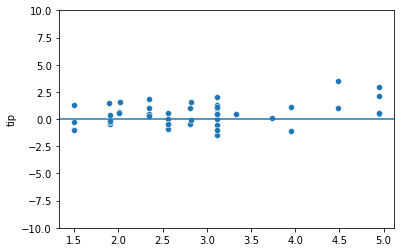

In [134]:
residuals_tuned = y_test - y_pred_tuned

sns.scatterplot(y_pred, residuals_tuned)
plt.axhline(0)
plt.ylim(-10,10)
plt.show()

## Algorithm Chain Regression

In [136]:
X_train_val

total_bill  size  sex_Male  sex_Female  smoker_Yes  smoker_No  day_Thur  \
70        12.02     2         1           0           0          1         0   
146       18.64     3         0           1           0          1         1   
218        7.74     2         1           0           1          0         0   
113       23.95     2         1           0           0          1         0   
60        20.29     2         1           0           1          0         0   
..          ...   ...       ...         ...         ...        ...       ...   
195        7.56     2         1           0           0          1         1   
118       12.43     2         0           1           0          1         1   
67         3.07     1         0           1           1          0         0   
136       10.33     2         0           1           0          1         1   
96        27.28     2         1           0           1          0         0   

     day_Fri  day_Sat  day_Sun  time_Lunch  time_Dinner  
70         0        1        0           0            1  
146        0        0        0           1            0  
218        0        1        0           0            1  
113        0        0        1           0            1  
60         0        1        0           0            1  
..       ...      ...      ...         ...          ...  
195        0        0        0           1            0  
118        0        0        0           1            0  
67         0        1        0           0            1  
136        0        0        0           1            0  
96         1        0        0           0            1  

[195 rows x 12 columns]

In [140]:
X = tips.drop('tip',axis=1)
y = tips['tip']

In [142]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2)

In [146]:
X_train_val.select_dtypes(include='category').describe()

sex smoker  day    time
count    195    195  195     195
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     123    120   68     137

In [148]:
from sklearn.feature_selection import RFE

In [154]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker day time'.split())
], remainder='passthrough')

dtr_pipeline = Pipeline([
    ('transformer', transformer),
#     ('selection', RFE(estimator=tree)),
    ('dtr', tree)
])

In [155]:
dtr_pipeline_cv = cross_val_score(dtr_pipeline, X_train_val, y_train_val, scoring='neg_mean_squared_error')

In [156]:
print('score:', dtr_pipeline_cv)
print('score mean:', dtr_pipeline_cv.mean())
print('score std:', dtr_pipeline_cv.std())

score: [-0.61890743 -1.19676999 -0.79823336 -2.1623105  -1.08011416]
score mean: -1.171267088104416
score std: 0.5357950445621941


In [157]:
dtr_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['sex', 'smoker', 'day', 'time'])])),
  ('dtr', DecisionTreeRegressor(max_depth=5, random_state=2020))],
 'verbose': False,
 'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot', OneHotEncoder(drop='first'),
                                  ['sex', 'smoker', 'day', 'time'])]),
 'dtr': DecisionTreeRegressor(max_depth=5, random_state=2020),
 'transformer__n_jobs': None,
 'transformer__remainder': 'passthrough',
 'transformer__sparse_threshold': 0.3,
 'transformer__transformer_weights': None,
 'transformer__transformers': [('onehot',
   OneHotEncoder(drop='first'),
   ['sex', 'smoker', 'day', 'time'])],
 'transformer__verbose': False,
 'transformer__onehot': OneHotEncoder(drop='first'),
 'transformer__onehot__categories': 'auto',
 'transformer

In [161]:
hyperparam_space = {
    'dtr__min_samples_leaf': [1,5,10,15,20,50],
    'dtr__max_depth': [2,3,4,5,6,7],
    'dtr__criterion': ['mae', 'mse'],
    'transformer__onehot__drop': ['first', None]
}

In [164]:
randomized_search = RandomizedSearchCV(
    dtr_pipeline,
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1,
    verbose=1
)

In [165]:
randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:   10.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'day',
                                                                                'time'])])),
                                             ('dtr',
                                              DecisionTreeRegressor(max_depth=5,
                                                                    random_state=2020))]),
                   n_iter=20, n_jobs=-1,
     

In [167]:
dtr_pipe_tuned = randomized_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_pipe_tuned = dtr_pipe_tuned.predict(X_test)
print(mean_squared_error(y_test, y_pred_pipe_tuned))

1.7215628269883674
